<a href="https://colab.research.google.com/github/Hyrysake/My_Data_Science/blob/main/Hw_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Завдання 1

## Завантажте датасет за допомогою функції pandas.read_csv у змінну df. Виведіть перші 5 рядків, щоб переконатися в коректному зчитуванні даних:

In [24]:
df = pd.read_csv("bikes_rent.csv")
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


Для кожного дня прокату відомі такі ознаки:

season: 1 — весна, 2 — літо, 3 — осінь, 4 — зима  
yr: 0 — 2011, 1 — 2012  
mnth: від 1 до 12  
holiday: 0 — немає свята, 1 — є свято  
weekday: від 0 до 6  
workingday: 0 — неробочий день, 1 — робочий день  
weathersit: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)  
temp: температура в Цельсіях  
atemp: температура за відчуттями в Цельсіях  
hum: вологість  
windspeed(mph): швидкість вітру в милях за годину  
windspeed(ms): швидкість вітру в метрах за секунду  
cnt: кількість орендованих велосипедів (це цільова ознака, її ми будемо передбачати)  

Отже, у нас є речові, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як з речовими. З номінальними ознаками теж можна працювати як з речовими, тому що на них заданий порядок. Давайте подивимося на графіках, як цільова ознака залежить від решти.жить від решти.

Побудуйте графіки залежностей атрибутів від кількості поїздок. Іншими словами, вам потрібно побудувати 12 графіків. На кожному має бути зображена залежність чергового атрибута від змінної cnt.

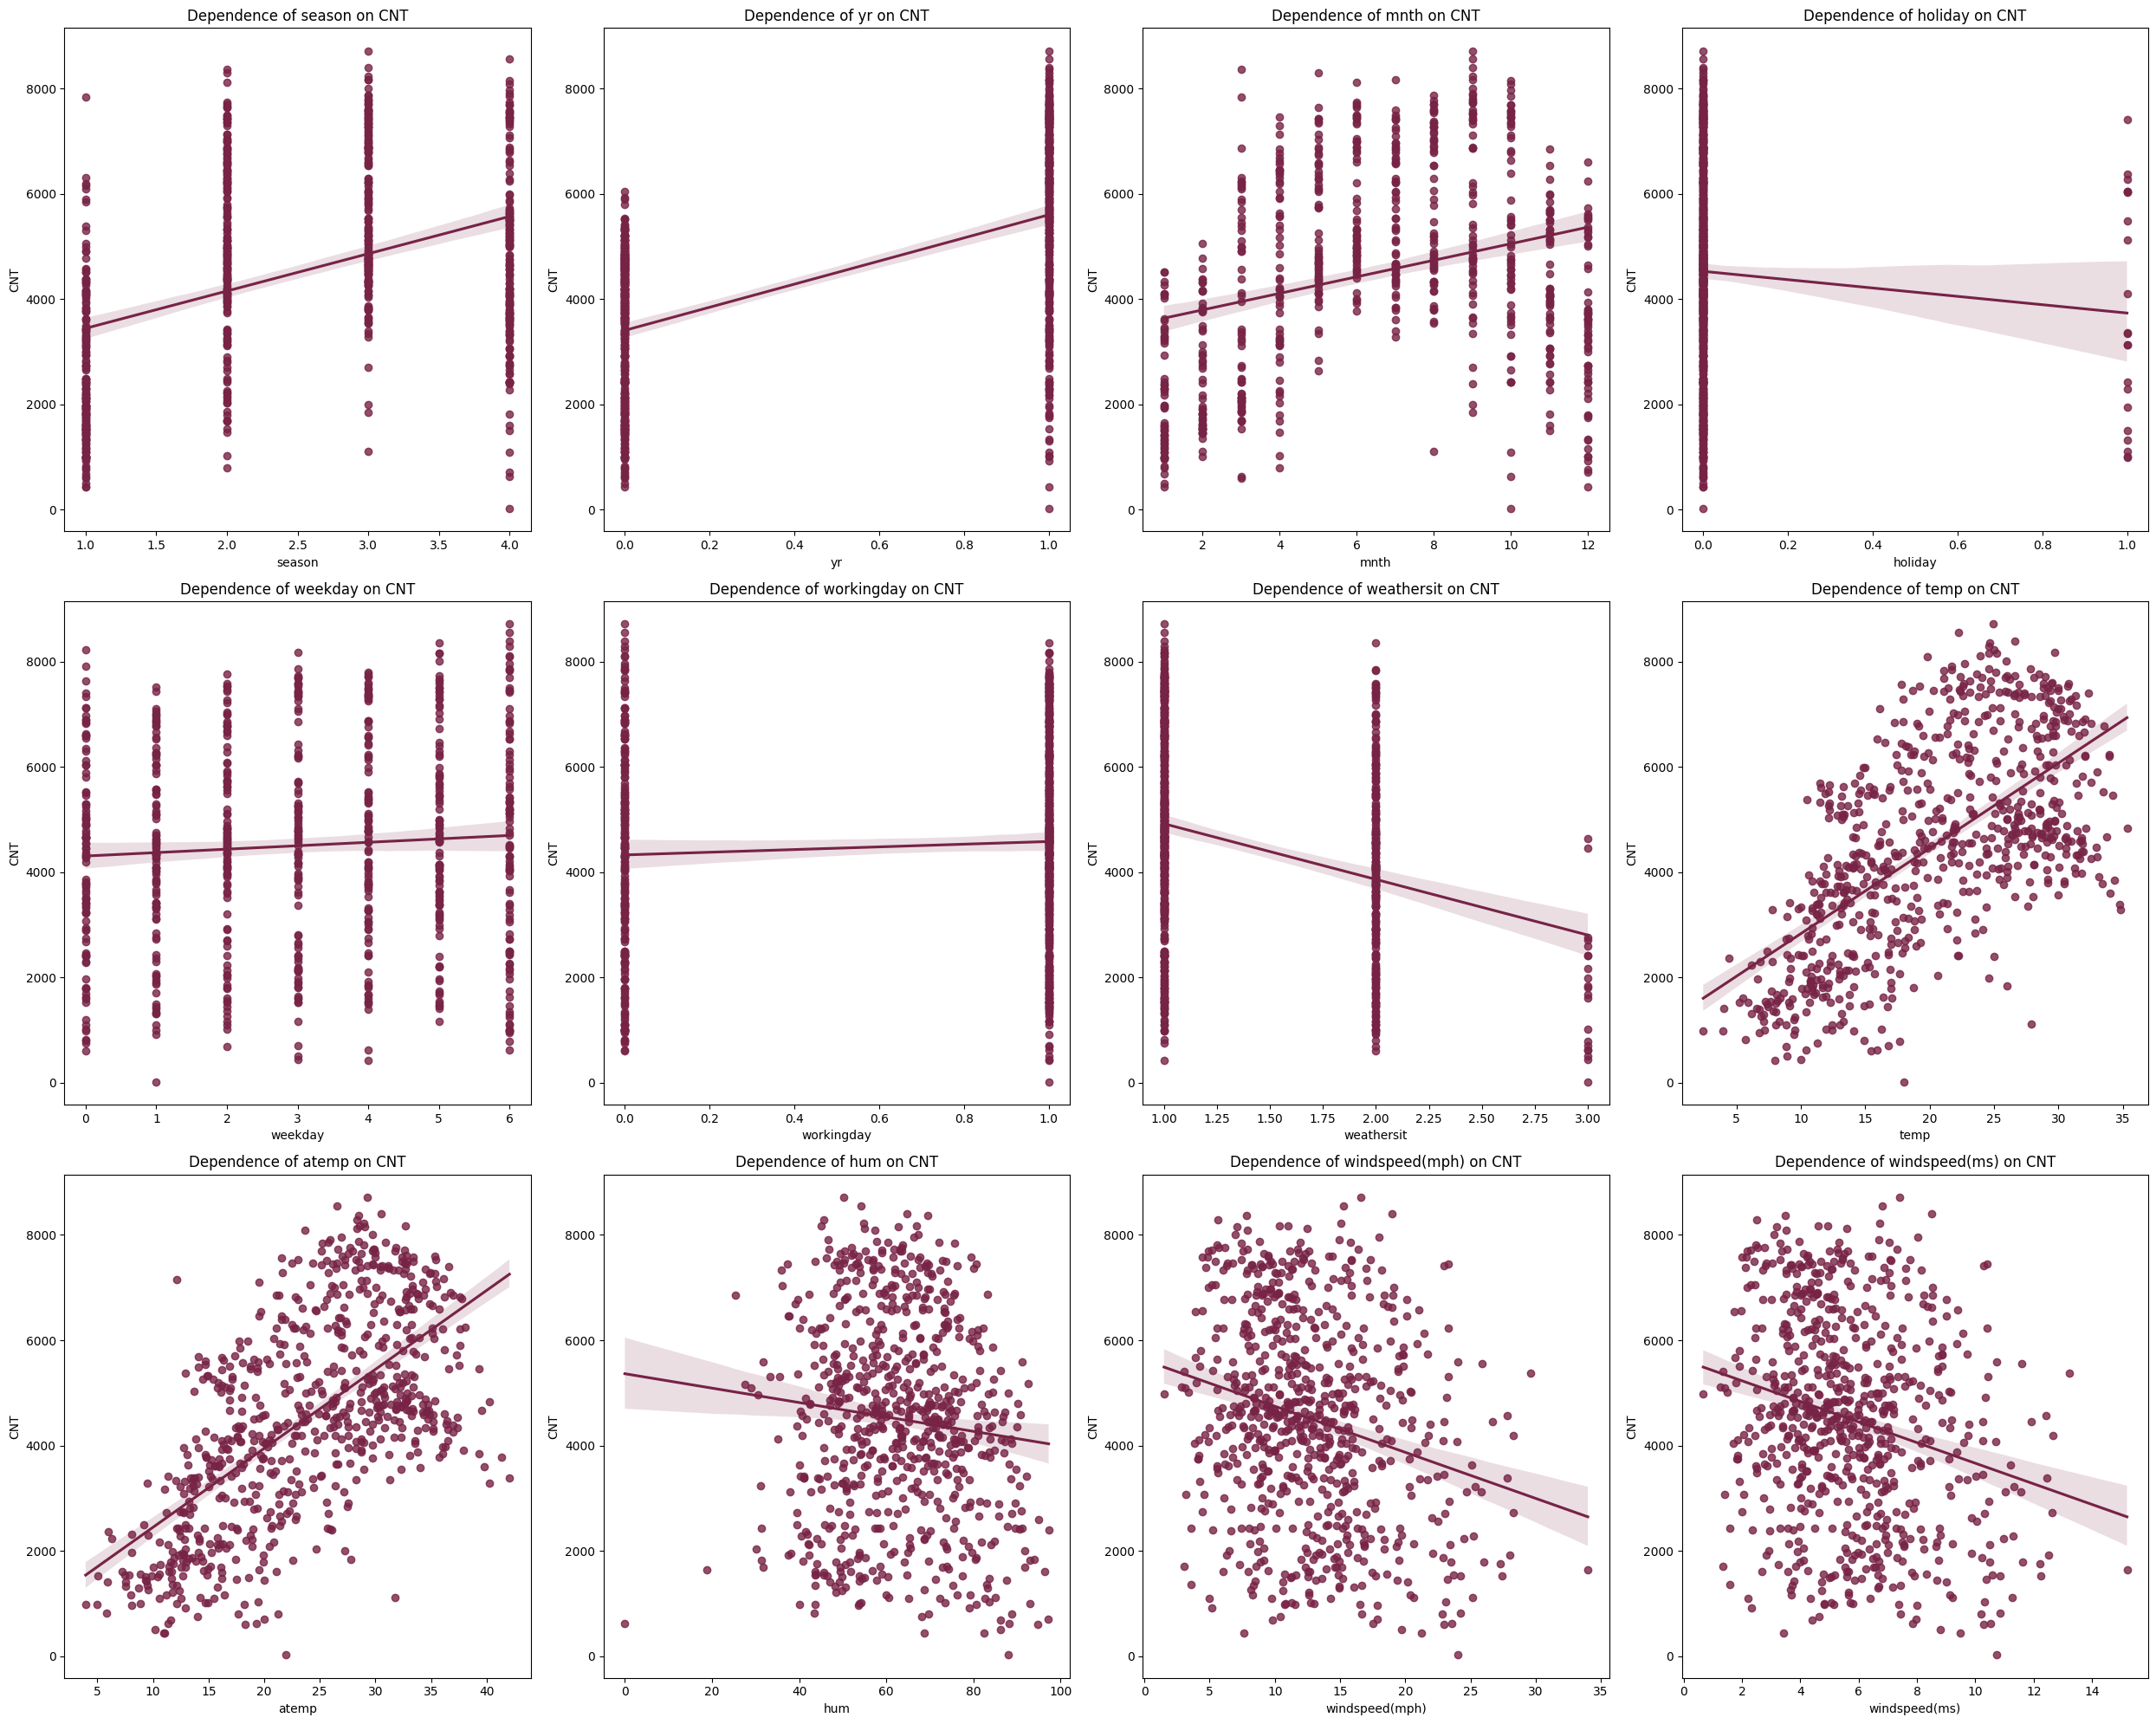

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 20))

for i, col in enumerate(df.columns[:-1]):
    sns.regplot(x=col, y="cnt", data=df, ax=axes[i//4, i%4], color="#772345")
    axes[i//4, i%4].set_title(f"Dependence of {col} on CNT")
    axes[i//4, i%4].set_xlabel(col)
    axes[i//4, i%4].set_ylabel("CNT")

plt.tight_layout()
plt.show()

Запитанняно.

Яким є характер залежності кількості прокатів від місяця? - Залежність має нелінійний характер. Вона поступово збільшується до квітня-травня, далі має стабільний високий показник до жовтня місяця, після чого йде на спад.

Вкажіть одну або дві ознаки, від яких кількість прокатів скоріше за все залежить лінійно. - Спостерагаю лінійну залежність кількості орендованих велосипедів від температури (чим вища температура, тим більше оренда) та температури за відчуттям, аналогічна залежність.

# Завдання 2

Давайте більш строго оцінимо рівень лінійної залежності між ознаками та цільовою змінною. Гарною мірою лінійної залежності між двома векторами є кореляція Пірсона. Нам уже доводилося мати з нею справу раніше. Для її обчислення в pandas можна використовувати методи датафрейму: corr і corrwith.

Порахуйте кореляції всіх ознак, окрім останньої, з останньою за допомогою методу corrwith.

In [26]:
сharacteristics = df.iloc[:, :-1]
goal = df.iloc[:, -1]

pearson_correlation = сharacteristics.corrwith(goal)

print("Correlations of features with the target variable:")
pearson_correlation

Correlations of features with the target variable:


season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

# Завдання 3

Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt за допомогою методу corr:

In [27]:
pairwise_correlations = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr()
pairwise_correlations

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


## Завдання 4

Виведіть середні ознак.

In [28]:
average_signs = df.mean()
average_signs

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки.

Проблема перша: колінеарні ознаки

Отже, у наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б одразу видалити дублікати, але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.

Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо її середнє і поділимо на стандартне відхилення. Це можна зробити за допомогою методу scale.

Крім того, необхідно перемішати вибірку, це буде потрібно для крос-валідації.

In [29]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [30]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.

In [31]:
from sklearn.linear_model import LinearRegression

# Завдання 5

Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі (ваги зберігаються у змінній coef_ класу регресора). Можна виводити пари (назва ознаки, вага), скориставшись функцією zip, вбудованою в мову python. Назви ознак зберігаються у змінній df.columns.

In [32]:
regression_data = LinearRegression()
regression_data.fit(X, y)

for feature, weight in zip(df.columns[:-1], regression_data.coef_):
    print(f"{feature}: {weight}")

season: 570.8637960129914
yr: 1021.9653779400622
mnth: -141.3017451148728
holiday: -86.7593446245368
weekday: 137.22506441350538
workingday: 56.391881775973005
weathersit: -330.2264620440312
temp: 367.48373260182126
atemp: 585.5493861188597
hum: -145.61430569885857
windspeed(mph): 12457138390688.885
windspeed(ms): -12457138390887.346


# Завдання 6

Давайте спробуємо навчити лінійні моделі з  L1  і  L2 -регуляризацією, а далі порівняємо їхні ваги. Навчіть регресори Ridge і Lasso з параметрами за замовчуванням і переконайтеся, що проблема з вагами вирішилась.

Навчіть лінійну модель з  L1 -регуляризацією (клас Lasso) і виведіть ваги.

In [33]:
from sklearn import linear_model

ridge_lasso_regressors = linear_model.Lasso(alpha=1)
ridge_lasso_regressors.fit(X, y)

for key, value in zip(df.columns[:-1], ridge_lasso_regressors.coef_):
    print(f"{key}: {value}")

season: 560.2416160308861
yr: 1019.4634940657196
mnth: -128.73062703678696
holiday: -86.15278133371106
weekday: 137.34789390496314
workingday: 55.21237064135668
weathersit: -332.3698569623487
temp: 376.3632362096943
atemp: 576.530793504555
hum: -144.12915500348583
windspeed(mph): -197.1396894024843
windspeed(ms): -2.8051404183533485e-08


Навчіть лінійну модель з  L2 -регуляризацією (клас Ridge) і виведіть ваги.

In [34]:
l2_regularization = linear_model.Ridge(alpha=1)
l2_regularization.fit(X, y)

for key, value in zip(df.columns[:-1], l2_regularization.coef_):
    print(f"{key}: {value}")

season: 563.0645722520181
yr: 1018.9483787875305
mnth: -131.87332028247715
holiday: -86.74609799709232
weekday: 138.00511117871918
workingday: 55.90311037506467
weathersit: -332.34978849907367
temp: 386.45788919190807
atemp: 566.3470470600669
hum: -145.07132729867195
windspeed(mph): -99.25944108179067
windspeed(ms): -99.25944115434177


# Завдання 7

На відміну від  L2 -регуляризації,  L1  обнуляє ваги при деяких ознаках. Давайте поспостерігаємо, як змінюються ваги зі збільшенням коефіцієнта регуляризації  α .

Для кожного значення коефіцієнта з alphas навчіть регресор Lasso і запишіть ваги у список coefs_lasso, а потім навчіть Ridge і запишіть ваги у списокcoefs_ridge. Конвертуйте отримані списки в np.array.

In [35]:
from sklearn.linear_model import Lasso, Ridge
alphas = np.arange(1, 500, 50)

coefs_lasso = [] # Put your code here
coefs_ridge = [] # Put your code here

for alpha in alphas:

    m_lasso= Lasso(alpha=alpha)
    m_lasso.fit(X, y)
    coefs_lasso.append(m_lasso.coef_)

    m_ridge = Ridge(alpha=alpha)
    m_ridge.fit(X, y)
    coefs_ridge.append(m_ridge.coef_)

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

Проаналізуйте динаміку ваг при збільшенні параметра регуляризації:

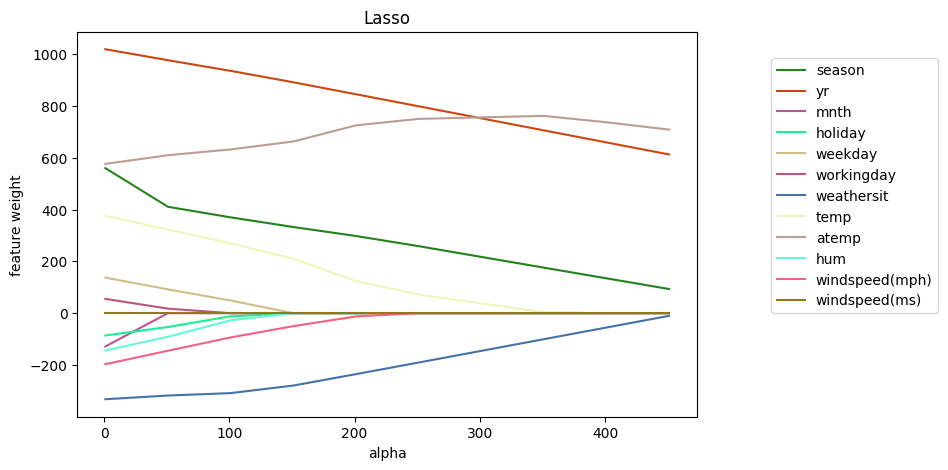

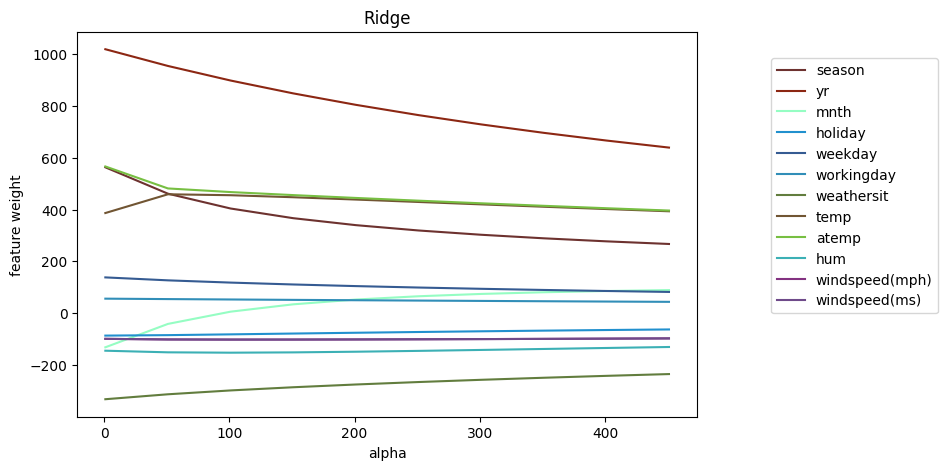

In [36]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

**Проаналізуйте графіки та дайте відповіді на такі запитання.**

Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при одному й тому самому alph - Більш агресивним є Lassoзнак?

Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть, чому так відбувається. - Всі ваги, крім ваги першої ознаки (вільного члену), будуть зменшуватись до нуля. Велике значення alpha призводить до того, що штраф за ненульові коефіцієнти стає таким великим, що регуляризатор Lasso вибирає варіант з усіма нульовими вагами, окрім ваги першої ознаки. Такий ефект називається рідкість (sparsity), і він допомагає зменшити кількість ознак у моделі, що допомагає уникнути перенавчання та поліпшити її узагальнення на нові дані.

Чи можна стверджувати, що Lasso виключає одну з ознак windspeed при будь-якому значенні alpha > 0? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт при ньому менший  10−3 . - Lasso може виключати одну з ознак windspeed при будь-якому значенні α > 0, оскільки L1-регуляризація приводить до різкого зменшення коефіцієнтів, що може призвести до нульових значень ваг для деяких ознак. Навпаки, Ridge не виключатиме цю ознаку, оскільки L2-регуляризація штрафує коефіцієнти за їх величину, але не обнуляє їх.


Який із регуляризаторів підійде для відбору неінформативних ознак? - краще використовувати регуляризатор Lasso, оскільки він здатний виключати ознаки з моделі, що мають незначний вплив на цільову змінну.

# Завдання 8

Далі будемо працювати з Lasso.

Отже, ми бачимо, що при зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.

Для цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику сам оптимізований функціонал методу найменших квадратів, тобто Mean Square Error.

По-друге, потрібно зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати alpha за значенням MSE на навчальній вибірці, тому що тоді ми не зможемо оцінити, як модель буде робити передбачення на нових для неї даних. Якщо ми виберемо одне розбиття вибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. Тому будемо робити декілька розбиттів вибірки, на кожному пробувати різні значення alpha, а потім усереднювати MSE. Найзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на  K  частин, і кожного разу брати одну з них як тестову, а з блоків, що залишилися, складати навчальну вибірку.

Робити крос-валідацію для регресії в sklearn зовсім просто: для цього є спеціальний регресор, LassoCV, який бере на вхід список із alpha і для кожного з них обчислює MSE на крос-валідації. Після навчання (якщо залишити параметр cv=3 за замовчуванням) регресор буде містити змінну mse_path_, матрицю розміру len(alpha) x k, k = 3 (число блоків у крос-валідації), що містить значення MSE на тесті для відповідних запусків. Крім того, у змінній alpha_ буде зберігатися вибране значення параметра регуляризації, а в coef_, традиційно, навчені ваги, що відповідають цьому alpha_.

Зверніть увагу, що регресор може змінювати порядок, у якому він проходить по alphas; для зіставлення з матрицею MSE краще використовувати змінну регресора alphas_.

Навчіть регресор LassoCV на всіх параметрах регуляризації з alpha. Побудуйте графік усередненого за рядками MSE в залежності від alpha (використовуйте для цього функцію create_plot).

Виведіть вибране alpha, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

In [37]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = data.alphas_
    y = [mse.mean() for mse in data.mse_path_]
    plt.plot(x, y, color="#008B8B", linewidth=2.5)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

Alpha = 6

season: 532.0189828413535
yr: 1015.0602226430595
mnth: -100.03952614356629
holiday: -83.29395987529904
weekday: 132.50446549095795
workingday: 51.557085614073735
weathersit: -330.5598567399817
temp: 370.67985503003405
atemp: 581.396931065498
hum: -140.00740550068844
windspeed(mph): -191.77140847135036
windspeed(ms): -2.6854702314758792e-08


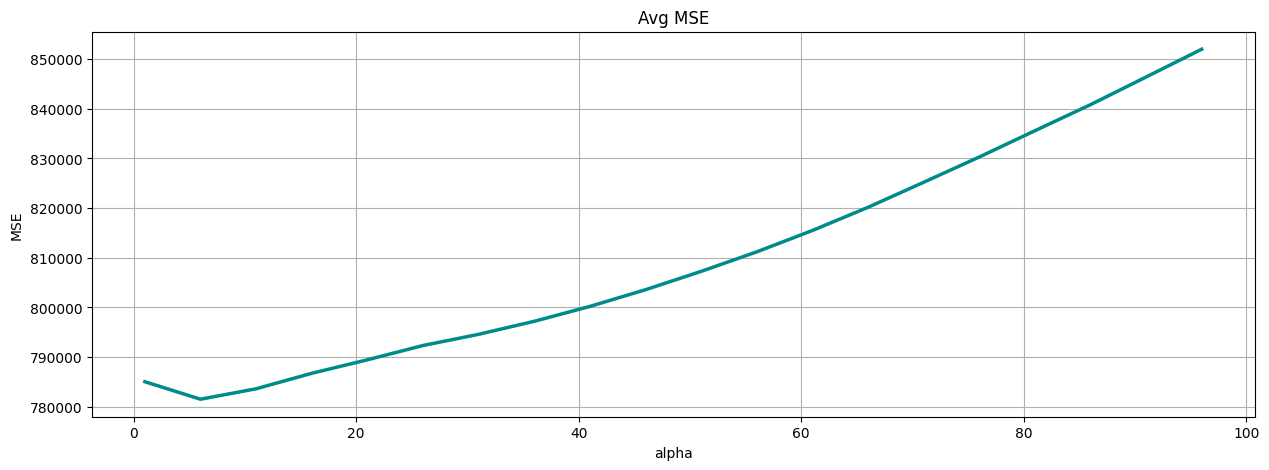

In [38]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

regressor = LassoCV(cv=3, random_state=0, alphas=alphas).fit(X, y)

print(f"Alpha = {regressor.alpha_}\n")

for key, value in zip(df.columns[:-1], regressor.coef_):
    print(f"{key}: {value}")

create_plot(regressor, "Avg MSE", "alpha", "MSE")

Отже, ми вибрали певний параметр регуляризації. Давайте подивимося, які б ми вибирали alpha, якби ділили вибірку лише один раз на навчальну та тестову, тобто розглянемо траєкторії MSE, що відповідають окремим блокам вибірки.

# Завдання 9

Виведіть значення alpha, що відповідають мінімумам MSE на кожному розбитті (тобто за стовпцями). На трьох окремих графіках візуалізуйте стовпці mse_path_.

Alpha = 6, MSE min = 733725.7604052249
Alpha = 1, MSE min = 799433.1673691692
Alpha = 51, MSE min = 796979.8955193626


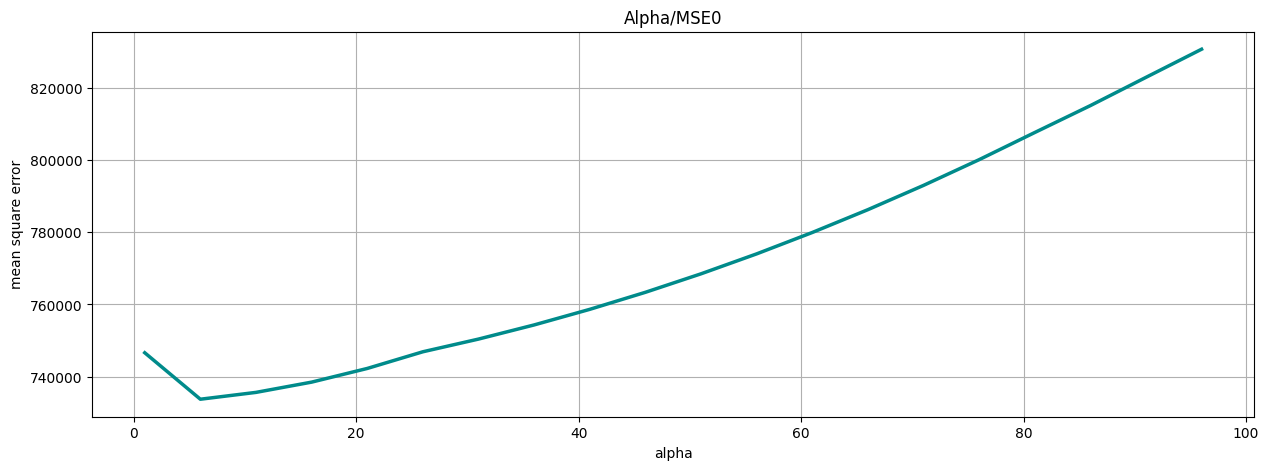

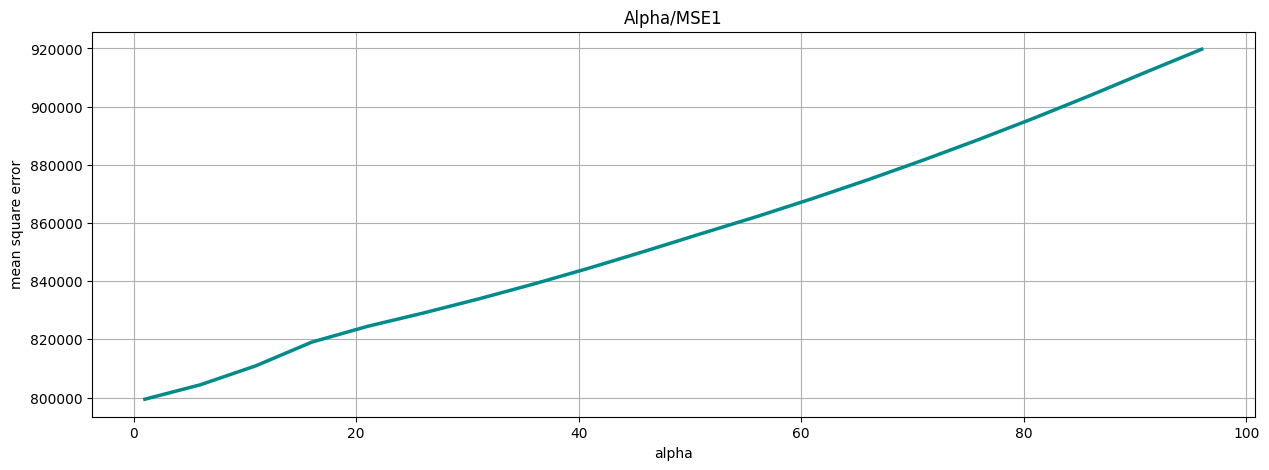

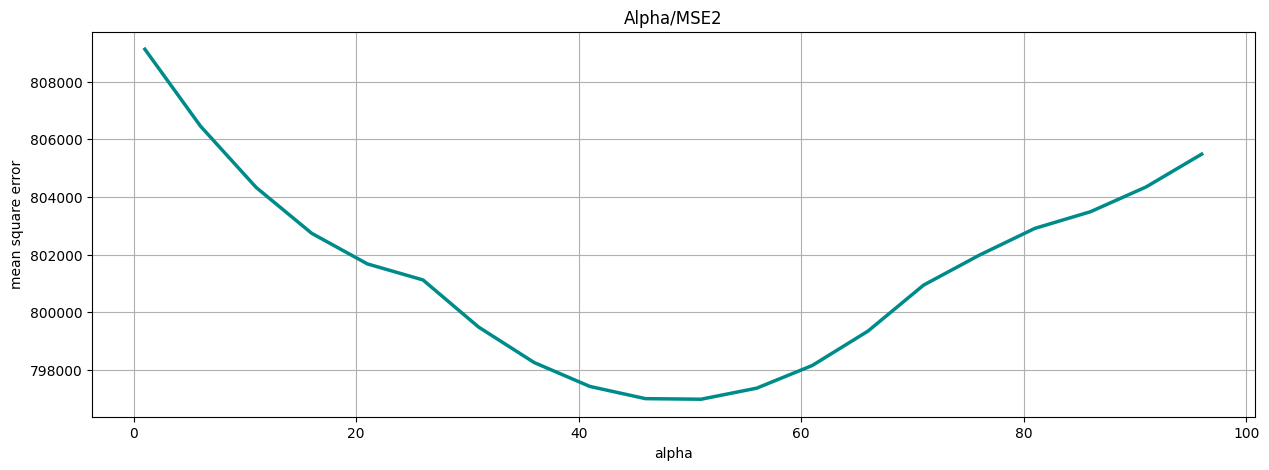

In [39]:
alpha = regressor.alphas_
mean_square_error = regressor.mse_path_
min_mean_square_error = mean_square_error.min(axis=0)
indices = np.argmin(mean_square_error, axis=0)

for i, m in zip(indices, min_mean_square_error):
    print(f"Alpha = {alpha[i]}, MSE min = {m}")

for i in range(len(mean_square_error.T)):
    plt.figure(figsize=(15, 5))
    x = alpha
    y = mean_square_error.T[i]
    plt.plot(x, y, color="#008B8B", linewidth=2.5)

    plt.title(f"Alpha/MSE{i}")
    plt.xlabel("alpha")
    plt.ylabel("mean square error")

    plt.grid()
    plt.show()

# Завдання 10

Нарешті, як прийнято в аналізі даних, давайте проінтерпретуємо результат. Дайте відповіді на наступні запитання.

## Запитання 1

В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей cnt від цих ознак, які ми зображали у блоці "Ознайомлення з даними". Чи видно зростаючу лінійну залежність cnt від цих ознак за графіками? Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?

In [40]:
four_features = pd.DataFrame({"value": regressor.coef_, "features": df.columns[:-1], })
four_features.sort_values(by="value", ascending=False).head(4)

,value,features
1,1015.060223,yr
8,581.396931,atemp
0,532.018983,season
7,370.679855,temp


4 ознаки з найбільшими (позитивними) коефіцієнтами - yr, atemp, season, temp

Чи видно зростаючу лінійну залежність cnt від цих ознак за графіками? - так

 Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди? - ні, залежності немає

## Запитання 2

Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. Чи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

In [41]:
average_coefficients = four_features[four_features.value<=0].sort_values(by="value", ascending=True).head(3)
average_coefficients.value = average_coefficients.value.abs()
average_coefficients

,value,features
6,330.559857,weathersit
10,191.771408,windspeed(mph)
9,140.007406,hum


Чи видно лінійну залежність, що зменшується?  -  так

Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди? - так

## Запитання 3

Випишіть ознаки з коефіцієнтами, близькими до нуля (< 1e-3). Як ви думаєте, чому модель виключила їх із моделі (знову подивіться на графіки)? Чи правда, що вони ніяк не впливають на попит на велосипеди?

In [43]:
four_features.value = four_features.value.abs()
four_features.sort_values(by="value", ascending=False).tail(1)

,value,features
11,2.685470e-08,windspeed(ms)


Як ви думаєте, чому модель виключила їх із моделі (знову подивіться на графіки)? - Тому що це дубль данних windspeed(mph)

Чи правда, що вони ніяк не впливають на попит на велосипеди? - Ні, вплив існує.